In [1]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
df = pd.DataFrame(columns=['author','date','activity', 'text', 'files'])
filne = "log.txt"
##with urllib2.urlopen("https://file.io/rSWakX") as f:
with open(filne, 'r+', encoding="utf-8") as f:
    lines = f.readlines()
    ##for i in range(0, 100):
  
    for i in range(0, len(lines)):
        line = lines[i]
        if line[:6] == "commit":
            sha = line[8:].strip()
            ##Author
            line = lines[i+1]
            divided = line.split("<")
            divided[1][:-2]          
            author = divided[1][:-2]
            ##Author
            line = lines[i+2]
            divided = line.split(":   ")
            date = divided[1].strip()
            line = lines[i+3]  
            text = ""
            if line in ['\n', '\r\n']:
                line = lines[i + 4]
                divided = line.split(":")
                activity = divided[0].strip()
            j = 5
            text += line
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                text += line    
                j = j + 1
            j = j + 1
            files = []
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                files.append(line)   
                j = j + 1
            print("...........")
            ##print sha
            ##print author
            ##print date
            ##print activity
            ##print files
            print(text)
            df.loc[sha] = pd.Series({'author': author, 'date': date, 'activity': activity, 'text': text, 'files': files})
        


...........
    Docs: Correct typo in issue template

...........
    Build: Drop support for building on Node.js 0.12
    
    Node.js 0.12 is no longer supported by upstream. So far we had to keep
    a workaround that would skip running ESLint there (or even load its task)
    as it no longer supports Node.js <4; the same applied to Node smoke tests
    as jsdom has also dropped support for those old Node versions. Those
    workarounds have been removed now.
    
    Ref 030191ae32dfcb7ecb2efb61d17a4964a3633e44
    Closes gh-3478

...........
    Tests: Added tests for symbol-separated tag names
    
    Fixes gh-2006
    Closes gh-3473

...........
    Offset: Eliminate little-used internal function
    
    Fixes gh-3449
    Closes gh-3456

...........
    Build: Use valid ecmaVersion
    
    Fixes Node smoke tests
    
    Ref gh-3385
    Closes gh-3460

...........
    Build: Add most of the dist folder to .eslintignore
    
    This way `eslint .` run from the terminal will w

IndexError: list index out of range

In [ ]:
df.head()

In [ ]:
df['changes'] = pd.Series(df['files'].str[-1], index=df.index)

In [ ]:
df['n_files'] = pd.Series(df['changes'].str.split().str[0] , index=df.index)
df['insertions'] = pd.Series(df['changes'].str.split(",").str[1].str.split().str[0] , index=df.index)
df['deletions'] = pd.Series(df['changes'].str.split(",").str[2].str.split().str[0] , index=df.index)


In [ ]:
del df['changes']
df.head()

In [ ]:
df['n_files'] = df.n_files.apply(pd.to_numeric, args=('coerce',))
df['insertions'] = df.insertions.apply(pd.to_numeric, args=('coerce',))
df['deletions'] = df.deletions.apply(pd.to_numeric, args=('coerce',))


In [ ]:
df.head()

In [ ]:
pattern_code = ".*\.awk(~?)|.*\.scm(~?)|.*\.glsl(~?)|.*\.patch(~?)|.*\.c((\.swp)?)(~?)|.*/script(s?)/.*|.*\.jar(~?)|.*/src/.*|.*\.m((\.swp)?)(~?)|.*\.cs(~?)|.*\.idl(~?)|.*\.s(~?)|.*\.r((\.swp)?)(~?)|.*\.cxx(~?)|.*\.pyc(~?)|.*\.asm(x?)(~?)|.*\.py((\.swp)?)(~?)|.*\.y((\.swp)?)(~?)|.*\.gi((\.swp)?)(∼?)|.*\.t((\.swp)?)(~?)|.*\.dll(~?)|.*\.h˙template((\.swp)?)(∼?)|.*\.js((\.swp)?)(~?)|.*\.rb((\.swp)?)(~?)|.*\.c˙template((\.swp)?)(∼ ?)|.*\.hg((\.swp)?)(~?)|.*\.pm((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.cc((\.swp)?)(~?)|.*\.sh((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.el((\.swp)?)(~?)|.*\.hh((\.swp)?)(~?)|.*\.h((pp)?)((\.swp)?)(∼ ?)|.*\.xs((\.swp)?)(~?)|.*\.pl((\.swp)?)(~?)|.*\.h\.tmpl((\.swp)?)(∼?)|.*\.mm((\.swp)?)(~?)|.*\.idl((\.swp)?)(~?)|.*\.h.win32((\.swp)?)(∼ ?)|.*\.xpt((\.swp)?)(~?)|.*\.ccg((\.swp)?)(~?)|.*\.c˙tmpl((\.swp)?)(∼?)|.*\.snk((\.swp)?)(~?)|.*\.inc((\.swp)?)(~?)|.*\.asp(x?)((\.swp)?)(∼ ?)|.*\.cpp((\.swp)?)(~?)|.*\.gob((\.swp)?)(~?)|.*\.vapi((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.dtd((\.swp)?)(~?)|.*\.gidl((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.ada((\.swp)?)(~?)|.*\.defs((\.swp)?)(∼?)|.*\.tcl((\.swp)?)(~?)|.*\.vbs((\.swp)?)(~?)|.*\.java((\.swp)?)(∼?)|.*\.nib((\.swp)?)(~?)|.*\.sed((\.swp)?)(~?)|.*\.vala((˙swp)?)(∼?)"
pattern_doc = "|.*\.zabw|.*/potfiles|.*/install|.*\.wml|.*\.chm|.*\.ods|.*/copyright|.*/version|.*\.css|.*\.vcard(~?)|.*/plan|.*/feature(s?)|.*\.txt((\.bak)?)|.*/credits|.*/notes|.*/licence|.*\.txt((\.old)?)|.*\.man|.*/howto|.*/license|.*\.rtf|.*\.ics|.*/faq|.*/maintainers|.*\.tex|.*/documenters|.*copying|.*/copying|.*\.sgml|.*\.gnumeric|.*/copying.*|.*/committers|.*\.eps|.*\.vcf|.*/doc(s?)/.*|.*/thanks|.*\.xsd|.*\.schemas|.*/help(s?)/.*|.*/authors|.*\.texi|.*\.doc|.*/bugs|.*\.docx"
pattern_test = ".*\.test(s?)/.*|.*/.*test\..*|.*/test.*\..*"
pattern_build = "|.*\.m4(~?)|.*makefile.*|.*\.prj|.*\.plo|.*\.mk|.*\.make|.*\.deps|.*\.wxiproj|.*\.am(~?)|.*\.mp4|.*\.builder|.*\.lo|.*\.target|.*\.iss|.*\.nsi|.*\.wxi|.*/configure((\..+)?)|.*\.wxs|.*/mkbundle\..+|.*\.in|.*/autogen\.((.+\.)?)sh|.*\.wpj|.*\.vc(x?)proj(i?)n((\.filters((in)?))?)|.*\.vcproj((\.filters((in)?))?)"

In [ ]:
df['pat_code'] = 0
df['pat_doc'] = 0
df['pat_test'] = 0
df['pat_build'] = 0
df.head()

In [110]:
import re
for index, row in df.iterrows():
    code = 0
    doc = 0
    test = 0
    build = 0
    for j in range(0, len(row['files'])):
        match_code = re.match(pattern_code, row['files'][j], flags=0)
        if match_code:
            code += 1
        match_doc = re.match(pattern_doc, row['files'][j], flags=0)
        if match_doc:
            doc += 1
        match_test = re.match(pattern_test, row['files'][j], flags=0)
        if match_test:
            test += 1
        match_build = re.match(pattern_build, row['files'][j], flags=0)
        if match_build:
            build += 1
    
    df.set_value(index, 'pat_code', code) 
    df.set_value(index, 'pat_doc', doc) 
    df.set_value(index, 'pat_test', test) 
    df.set_value(index, 'pat_build', build) 
df.head()
    

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
8816caf26c0acc7067cd5bad9c03cfb54e54979,alex@louden.com,Thu Jan 5 16:49:02 2017 +0800,Docs,Docs: Correct typo in issue template\n,"[ .github/ISSUE_TEMPLATE.md | 2 +-\n, 1 file ...",1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0
10ac0e532a9376106c50f0c21a0d0fd0483b700,m.goleb@gmail.com,Fri Dec 30 12:17:00 2016 +0100,Build,Build: Drop support for building on Node.j...,"[ .travis.yml | 1 -\n, Gruntfile.js | 39 ++...",2.0,11.0,29.0,2,3,0,3,0,0,1,2,0,0
d9145fa15d91ab6c804161ecd892d4d08b71aa2,broder93@gmail.com,Sat Dec 24 10:33:27 2016 +0000,Tests,Tests: Added tests for symbol-separated ta...,[ test/unit/core.js | 27 ++++++++++++++++++---...,1.0,18.0,9.0,1,2,0,2,0,0,2,0,0,0
f3a43eff8682b59cec785be6003753fa4b93706,richard.gibson@gmail.com,Mon Dec 19 12:00:46 2016 -0500,Offset,Offset: Eliminate little-used internal fun...,"[ src/offset.js | 20 ++++++++++----------\n, ...",1.0,10.0,10.0,1,2,0,2,0,0,0,0,0,0
cb4cd71ef018854f75646270bacd4c4d3da9cde,richard.gibson@gmail.com,Mon Dec 19 11:58:48 2016 -0500,Build,Build: Use valid ecmaVersion\n \n Fi...,[ test/node_smoke_tests/.eslintrc.json | 2 +-\...,1.0,1.0,1.0,1,2,0,2,0,0,1,1,0,0


In [111]:
df.insertions.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count     1190.000000
mean       108.291597
std       1110.613714
min          1.000000
25%               NaN
50%               NaN
75%               NaN
max      27783.000000
Name: insertions, dtype: float64

In [112]:
comment_code = "(?:^|\W)cod(?:$|)"
comment_doc = "(?:^|\W)doc(?:$|)"
comment_test = "(?:^|\W)test(?:$|)"
comment_build = "(?:^|\W)build(?:$|)"


In [113]:
df['text_code'] = 0
df['text_doc'] = 0
df['text_test'] = 0
df['text_build'] = 0

In [114]:
match_code = re.findall(comment_code, df['text'][1], re.IGNORECASE)
match_doc = re.findall(comment_doc, df['text'][1], re.IGNORECASE)
match_test = re.findall(comment_test, df['text'][1], re.IGNORECASE)
match_build = re.findall(comment_build, df['text'][1], re.IGNORECASE)


In [115]:
for index, row in df.iterrows():   
    match_code = re.findall(comment_code, row['text'], re.IGNORECASE)
    match_doc = re.findall(comment_doc, row['text'], re.IGNORECASE)
    match_test = re.findall(comment_test, row['text'], re.IGNORECASE)
    match_build = re.findall(comment_build, row['text'], re.IGNORECASE)

    df.set_value(index, 'text_code', len(match_code)) 
    df.set_value(index, 'text_doc', len(match_doc)) 
    df.set_value(index, 'text_test', len(match_test))
    df.set_value(index, 'text_build', len(match_build)) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
8816caf26c0acc7067cd5bad9c03cfb54e54979,alex@louden.com,Thu Jan 5 16:49:02 2017 +0800,Docs,Docs: Correct typo in issue template\n,"[ .github/ISSUE_TEMPLATE.md | 2 +-\n, 1 file ...",1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0
10ac0e532a9376106c50f0c21a0d0fd0483b700,m.goleb@gmail.com,Fri Dec 30 12:17:00 2016 +0100,Build,Build: Drop support for building on Node.j...,"[ .travis.yml | 1 -\n, Gruntfile.js | 39 ++...",2.0,11.0,29.0,2,3,0,3,0,0,1,2,0,0
d9145fa15d91ab6c804161ecd892d4d08b71aa2,broder93@gmail.com,Sat Dec 24 10:33:27 2016 +0000,Tests,Tests: Added tests for symbol-separated ta...,[ test/unit/core.js | 27 ++++++++++++++++++---...,1.0,18.0,9.0,1,2,0,2,0,0,2,0,0,0
f3a43eff8682b59cec785be6003753fa4b93706,richard.gibson@gmail.com,Mon Dec 19 12:00:46 2016 -0500,Offset,Offset: Eliminate little-used internal fun...,"[ src/offset.js | 20 ++++++++++----------\n, ...",1.0,10.0,10.0,1,2,0,2,0,0,0,0,0,0
cb4cd71ef018854f75646270bacd4c4d3da9cde,richard.gibson@gmail.com,Mon Dec 19 11:58:48 2016 -0500,Build,Build: Use valid ecmaVersion\n \n Fi...,[ test/node_smoke_tests/.eslintrc.json | 2 +-\...,1.0,1.0,1.0,1,2,0,2,0,0,1,1,0,0


In [116]:
from textblob import TextBlob

In [117]:
df['subjectivity'] = 0
df['polarity'] = 0

In [118]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
8816caf26c0acc7067cd5bad9c03cfb54e54979,alex@louden.com,Thu Jan 5 16:49:02 2017 +0800,Docs,Docs: Correct typo in issue template\n,"[ .github/ISSUE_TEMPLATE.md | 2 +-\n, 1 file ...",1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0
10ac0e532a9376106c50f0c21a0d0fd0483b700,m.goleb@gmail.com,Fri Dec 30 12:17:00 2016 +0100,Build,Build: Drop support for building on Node.j...,"[ .travis.yml | 1 -\n, Gruntfile.js | 39 ++...",2.0,11.0,29.0,2,3,0,3,0,0,1,2,0,0
d9145fa15d91ab6c804161ecd892d4d08b71aa2,broder93@gmail.com,Sat Dec 24 10:33:27 2016 +0000,Tests,Tests: Added tests for symbol-separated ta...,[ test/unit/core.js | 27 ++++++++++++++++++---...,1.0,18.0,9.0,1,2,0,2,0,0,2,0,0,0
f3a43eff8682b59cec785be6003753fa4b93706,richard.gibson@gmail.com,Mon Dec 19 12:00:46 2016 -0500,Offset,Offset: Eliminate little-used internal fun...,"[ src/offset.js | 20 ++++++++++----------\n, ...",1.0,10.0,10.0,1,2,0,2,0,0,0,0,0,0
cb4cd71ef018854f75646270bacd4c4d3da9cde,richard.gibson@gmail.com,Mon Dec 19 11:58:48 2016 -0500,Build,Build: Use valid ecmaVersion\n \n Fi...,[ test/node_smoke_tests/.eslintrc.json | 2 +-\...,1.0,1.0,1.0,1,2,0,2,0,0,1,1,0,0


In [119]:
df.polarity.describe()

count    1191.000000
mean        0.001679
std         0.040962
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: polarity, dtype: float64

In [120]:
print('Class                                                                                        Amount')
for i in range(1,10):
    classCount = df.activity.value_counts()
print(classCount)

Class                                                                                        Amount
Build                                                                                                                                     162
Tests                                                                                                                                      96
Core                                                                                                                                       67
Event                                                                                                                                      48
CSS                                                                                                                                        41
Ajax                                                                                                                                       40
No ticket                                       

In [121]:
print('User                                 Count')
for i in range(1,10):
    classCount = df.author.value_counts()
print(classCount)

User                                 Count
timmywillisn@gmail.com                245
m.goleb@gmail.com                     221
markelog@gmail.com                    179
richard.gibson@gmail.com              145
dave.methvin@gmail.com                135
waldron.rick@gmail.com                 38
scott.gonzalez@gmail.com               12
joern.zaefferer@gmail.com               9
j@ubourg.net                            8
jason+github@jbedard.ca                 8
ChrisAntaki@gmail.com                   7
krinklemail@gmail.com                   7
4timmywil@gmail.com                     6
thomastortorini@gmail.com               6
gnarf@gnarf.net                         5
github@jbedard.ca                       4
all3fox@gmail.com                       3
araghavan3@gmail.com                    3
ruado1987@gmail.com                     3
leonardo.braga@gmail.com                3
liza.h.ramo@gmail.com                   2
anthonyryan1@gmail.com                  2
contact@arthurverschaeve.be      

In [122]:
x = {'Count': pd.Series(df.activity.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()






                    
                    


,Count
Build,162
Tests,96
Core,67
Event,48
CSS,41


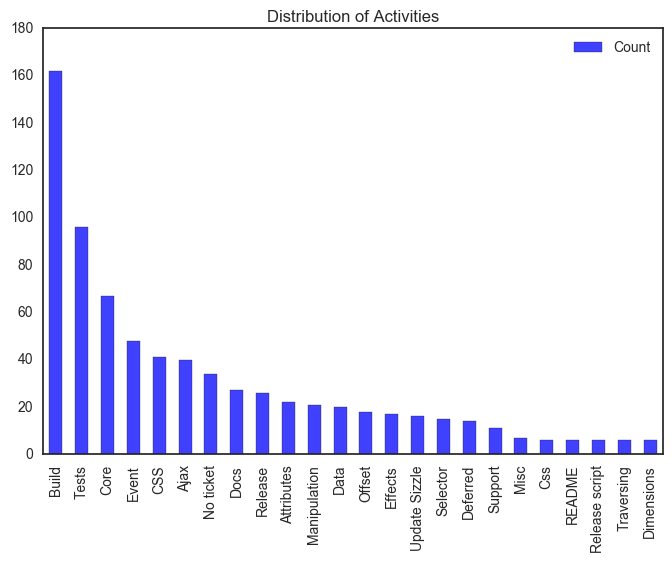

In [123]:
plt.figure(figsize=(18,10))
activity_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("Distribution of Activities")
plt.show()

In [124]:
dfTest = df[df.activity.isin(["Build","Tests", "Docs", "Release", "Core"])] 

In [125]:
dfTest.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,378.000000,378.000000,312.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,3.574074,117.076720,132.262821,3.280423,4.574074,0.185185,4.574074,0.042328,0.097884,0.671958,0.476190,0.026455,0.002646
std,9.555426,785.713143,931.973549,9.215411,9.555426,0.615962,9.555426,0.354294,0.314876,1.029180,0.555383,0.160697,0.051434
min,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,6.000000,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,20.750000,NaN,3.000000,4.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,129.000000,8708.000000,11415.000000,129.000000,130.000000,8.000000,130.000000,6.000000,2.000000,7.000000,2.000000,1.000000,1.000000


In [126]:
dfTest['deletions'] = dfTest['deletions'].fillna('0')


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [127]:
dfTest.to_csv('jQuery_Training.csv', encoding="utf-8")

In [128]:
from sklearn import cross_validation
from sklearn.preprocessing import *
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.cross_validation import KFold
import random

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
dfFinal = dfTest.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)

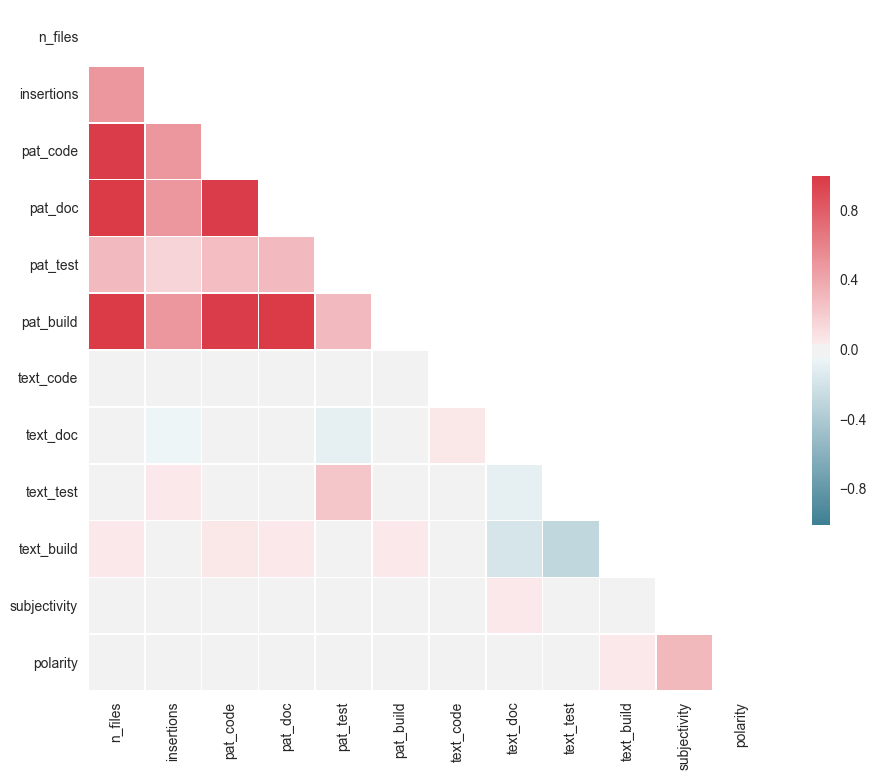

In [131]:
sns.set(style="white")
corr = dfFinal.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
sns.plt.show()

In [132]:
X = dfFinal.values
y = dfTest.activity.values

In [133]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
y_train

array(['Tests', 'Tests', 'Build', 'Build', 'Build', 'Build', 'Core',
       'Tests', 'Build', 'Core', 'Build', 'Tests', 'Core', 'Build',
       'Build', 'Build', 'Build', 'Core', 'Docs', 'Core', 'Core', 'Tests',
       'Release', 'Tests', 'Tests', 'Build', 'Core', 'Tests', 'Build',
       'Build', 'Build', 'Build', 'Release', 'Build', 'Build', 'Build',
       'Build', 'Docs', 'Tests', 'Build', 'Tests', 'Tests', 'Build',
       'Build', 'Build', 'Build', 'Tests', 'Tests', 'Tests', 'Release',
       'Tests', 'Tests', 'Docs', 'Build', 'Tests', 'Build', 'Build',
       'Tests', 'Tests', 'Tests', 'Build', 'Tests', 'Build', 'Tests',
       'Build', 'Build', 'Core', 'Docs', 'Docs', 'Core', 'Tests', 'Build',
       'Build', 'Build', 'Core', 'Tests', 'Build', 'Build', 'Tests',
       'Tests', 'Core', 'Tests', 'Build', 'Build', 'Build', 'Build',
       'Tests', 'Build', 'Tests', 'Tests', 'Tests', 'Release', 'Build',
       'Core', 'Build', 'Core', 'Tests', 'Core', 'Docs', 'Build', 'Build',
     

In [134]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


'accuracy: 86.3 percent'

In [135]:
df.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,1190.000000,1190.000000,1052.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,2.757143,108.291597,80.349810,2.512175,3.756507,0.104954,3.756507,0.032746,0.047859,0.347607,0.183039,0.031066,0.001679
std,6.368077,1110.613714,947.352964,6.047958,6.365439,0.503668,6.365439,0.242055,0.232401,0.740254,0.418177,0.173570,0.040962
min,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,129.000000,27783.000000,25858.000000,129.000000,130.000000,9.000000,130.000000,6.000000,3.000000,7.000000,3.000000,1.000000,1.000000


In [136]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
##from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [137]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

IndexError: too many indices for array

In [138]:
dfComplete = df.copy()
dfComplete['deletions'] = dfComplete['deletions'].fillna(0)
dfComplete['n_files'] = dfComplete['n_files'].fillna(0)
dfComplete['insertions'] = dfComplete['insertions'].fillna(0)
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,2.754828,108.200672,70.972292,2.512175,3.756507,0.104954,3.756507,0.032746,0.047859,0.347607,0.183039,0.031066,0.001679
std,6.365902,1110.151406,890.680818,6.047958,6.365439,0.503668,6.365439,0.242055,0.232401,0.740254,0.418177,0.173570,0.040962
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,25.000000,12.000000,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,129.000000,27783.000000,25858.000000,129.000000,130.000000,9.000000,130.000000,6.000000,3.000000,7.000000,3.000000,1.000000,1.000000


In [139]:
dfCompleteX = dfComplete.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)

In [140]:
dfCompleteX.head()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
8816caf26c0acc7067cd5bad9c03cfb54e54979,1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0
10ac0e532a9376106c50f0c21a0d0fd0483b700,2.0,11.0,29.0,2,3,0,3,0,0,1,2,0,0
d9145fa15d91ab6c804161ecd892d4d08b71aa2,1.0,18.0,9.0,1,2,0,2,0,0,2,0,0,0
f3a43eff8682b59cec785be6003753fa4b93706,1.0,10.0,10.0,1,2,0,2,0,0,0,0,0,0
cb4cd71ef018854f75646270bacd4c4d3da9cde,1.0,1.0,1.0,1,2,0,2,0,0,1,1,0,0


In [141]:
dfComplete["predicted"] = clf.predict(dfCompleteX)

In [142]:
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,2.754828,108.200672,70.972292,2.512175,3.756507,0.104954,3.756507,0.032746,0.047859,0.347607,0.183039,0.031066,0.001679
std,6.365902,1110.151406,890.680818,6.047958,6.365439,0.503668,6.365439,0.242055,0.232401,0.740254,0.418177,0.173570,0.040962
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,3.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,25.000000,12.000000,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,129.000000,27783.000000,25858.000000,129.000000,130.000000,9.000000,130.000000,6.000000,3.000000,7.000000,3.000000,1.000000,1.000000


In [143]:
x = {'Count': pd.Series(dfComplete.predicted.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()

,Count
Core,710
Tests,232
Build,196
Docs,52
Release,1


In [144]:
dfComplete[["activity", "predicted"]]

,activity,predicted
8816caf26c0acc7067cd5bad9c03cfb54e54979,Docs,Docs
10ac0e532a9376106c50f0c21a0d0fd0483b700,Build,Build
d9145fa15d91ab6c804161ecd892d4d08b71aa2,Tests,Tests
f3a43eff8682b59cec785be6003753fa4b93706,Offset,Core
cb4cd71ef018854f75646270bacd4c4d3da9cde,Build,Build
754e315f8a7760bcdc162712d2be7fee058fdc2,Build,Build
3e0a560723762036b7a2a9d5c99b7b3681cbbc6,Build,Build
bc8638c38bccd4ac7b787ac4d79de4bf2b6a0a0,Build,Build
d79c6466386862e70ce276a094c1897112b7491,Deferred,Core
777899a747647f3fa839eea4b0bb695d3b60f06,Offset,Core


In [145]:
dfTest2 = pd.read_csv('nodejs_Training.csv', index_col=0, encoding="utf-8")
dfFinal2 = dfTest2.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal2.values
y = dfTest2.activity.values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)
clf2 = LinearDiscriminantAnalysis()
clf2.fit(X_train, y_train)
dfComplete["predicted2"] = clf2.predict(dfCompleteX)
dfComplete[["activity", "predicted", "predicted2"]]

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,activity,predicted,predicted2
8816caf26c0acc7067cd5bad9c03cfb54e54979,Docs,Docs,doc
10ac0e532a9376106c50f0c21a0d0fd0483b700,Build,Build,build
d9145fa15d91ab6c804161ecd892d4d08b71aa2,Tests,Tests,test
f3a43eff8682b59cec785be6003753fa4b93706,Offset,Core,src
cb4cd71ef018854f75646270bacd4c4d3da9cde,Build,Build,build
754e315f8a7760bcdc162712d2be7fee058fdc2,Build,Build,build
3e0a560723762036b7a2a9d5c99b7b3681cbbc6,Build,Build,build
bc8638c38bccd4ac7b787ac4d79de4bf2b6a0a0,Build,Build,build
d79c6466386862e70ce276a094c1897112b7491,Deferred,Core,src
777899a747647f3fa839eea4b0bb695d3b60f06,Offset,Core,src


In [149]:
def accuracy_dist(name, x, y, dfComplete):
    print("----")
    print(name)
    correct = len(dfComplete[dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    wrong = len(dfComplete[dfComplete.predicted.isin([x])][~dfComplete.predicted2.isin([y])]) + len(dfComplete[~dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    print("F1 score")
    print(2*correct/((2*correct) + wrong))
    print("Same")
    print(correct)
    print("Different")
    print(wrong)
    print("----")
accuracy_dist("CORE",  "Core", "src", dfComplete)
accuracy_dist("BUILD", "Build", "build", dfComplete)
accuracy_dist("DOCS",  "Docs", "doc", dfComplete)
accuracy_dist("TEST", "Tests", "test",  dfComplete)

----
CORE
F1 score
0.972083035075161
Same
679
Different
39
----
----
BUILD
F1 score
0.9493333333333334
Same
178
Different
19
----
----
DOCS
F1 score
0.9902912621359223
Same
51
Different
1
----
----
TEST
F1 score
0.9414225941422594
Same
225
Different
28
----


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


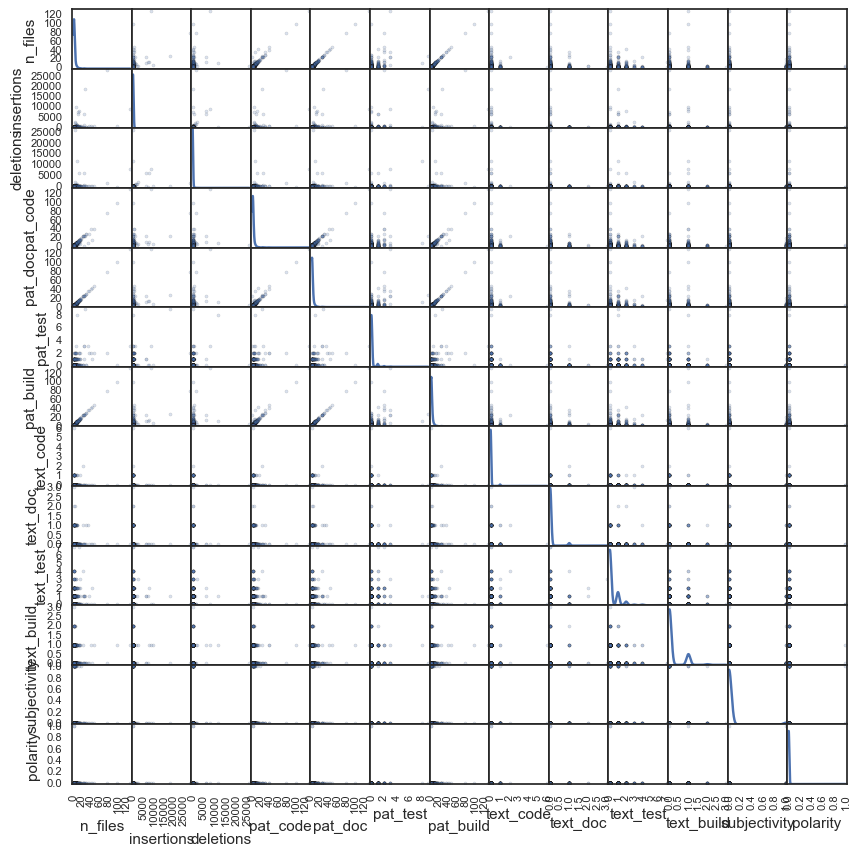

In [48]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(dfComplete, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

In [49]:
clf = GaussianNB()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 18.6 percent'

In [50]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 74.7 percent'

In [51]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [52]:
clf = KNeighborsClassifier()
clf.fit(X_train_sc, y_train)
accuracy = clf.score(X_test_sc, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 86.2 percent'

In [53]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

'accuracy: 85.7 percent'

In [54]:
def accuracy_dist(clfs, X, y, n=10):
    accuracy = np.zeros((n,len(clfs)))
    columns = [clf.__class__.__name__ for clf in clfs]
    for i in range(n):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=31*i)
        for j in range(len(clfs)):
            clf = clfs[j]
            clf.fit(X_train,y_train)
            accuracy[i][j] = clf.score(X_test,y_test)
    return pd.DataFrame(accuracy, columns=columns, index=range(n))

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:453: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


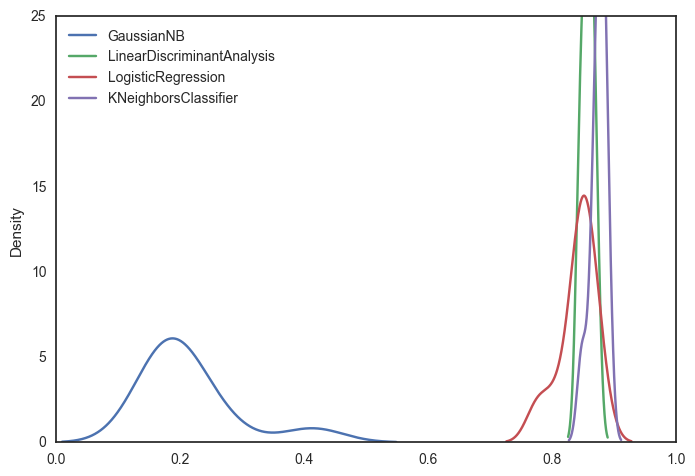

In [55]:
accuracy_df = accuracy_dist([GaussianNB(),LinearDiscriminantAnalysis(),LogisticRegression()], X, y)
accuracy_df = pd.concat(
    (accuracy_df, accuracy_dist([KNeighborsClassifier()], StandardScaler().fit_transform(X), y)), axis=1)
accuracy_df.plot(kind='kde', ylim=[0,25])
plt.show()

In [56]:
y = {'Count': pd.Series(df.author.value_counts())
     }
author_count = pd.DataFrame(y)
author_count.head()



,Count
timmywillisn@gmail.com,245
m.goleb@gmail.com,221
markelog@gmail.com,179
richard.gibson@gmail.com,145
dave.methvin@gmail.com,135


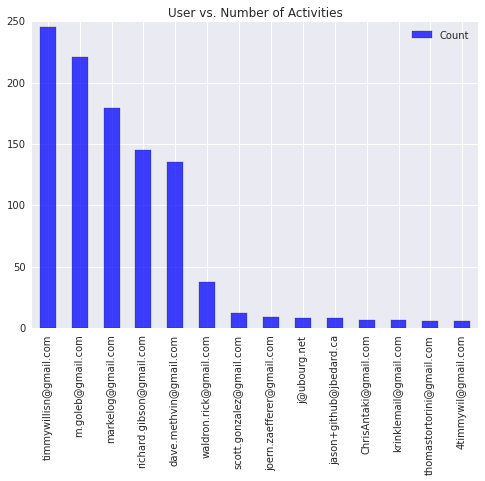

In [49]:
plt.figure(figsize=(18,10))
author_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("User vs. Number of Activities")
plt.show()

In [ ]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()